# Air quality time series


###Let us first describe the data

This dataset is made of the daily readings of the following air quality values for May 1, 1973 (a Tuesday) to September 30, 1973.

- Ozone: Mean ozone in parts per billion from 1300 to 1500 hours at Roosevelt Island
- Solar.R: Solar radiation in Langleys in the frequency band 4000–7700 Angstroms from 0800 to 1200 hours at Central Park
- Wind: Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport
- Temp: Maximum daily temperature in degrees Fahrenheit at La Guardia Airport.

** Source: **

The data was obtained from the New York State Department of Conservation (ozone data) and the National Weather Service (meteorological data).

We are now going to look at the data

In [3]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec

df_temp = pd.read_csv("airquality.csv", usecols = ["Ozone", "Solar.R", "Wind", "Temp", "Month", "Day"])

# We exclude the first column (= index) because we don't need it.
# To do that, just specify the columns of interest in usecols

#Let's add a year column
df_temp["Year"] = "1973"

# Let's inspect the first few elements
df_temp.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Year
0,41.0,190.0,7.4,67,5,1,1973
1,36.0,118.0,8.0,72,5,2,1973
2,12.0,149.0,12.6,74,5,3,1973
3,18.0,313.0,11.5,62,5,4,1973
4,NaN,NaN,14.3,56,5,5,1973


In [4]:
# It would be useful to create a data column (better plotting)
df_temp["Date"] = pd.to_datetime(df_temp["Year"] + df_temp["Month"].astype(str) + df_temp["Day"].astype(str) , format = "%Y%m%d")

In [5]:
# Let's inspect the first few elements again
print df_temp.head()
# Check each column's data type
print df_temp.dtypes

   Ozone  Solar.R  Wind  Temp  Month  Day  Year       Date
0   41.0    190.0   7.4    67      5    1  1973 1973-05-01
1   36.0    118.0   8.0    72      5    2  1973 1973-05-02
2   12.0    149.0  12.6    74      5    3  1973 1973-05-03
3   18.0    313.0  11.5    62      5    4  1973 1973-05-04
4    NaN      NaN  14.3    56      5    5  1973 1973-05-05
Ozone             float64
Solar.R           float64
Wind              float64
Temp                int64
Month               int64
Day                 int64
Year               object
Date       datetime64[ns]
dtype: object


# Working with NaN values

As you can see from the printed values, there are a few NaN in our array.
It probably means that the data was not recorded at this date.

We have several ways of dealing with that :

- We can ignore the relevant data line
- Or we can impute the missing data with, say, an average of a few previous points.

We are going to impute the missing data through interpolation.  
Say we have 1,NaN,2.   
We impute the missing value with (2+1)/2 - 1.5

In [6]:
# Let's see how to do that with pandas

# Get the data to interpolate
ozone = df_temp["Ozone"].values
solar = df_temp["Solar.R"].values
# Get a series of timestamps
timestamps = pd.to_datetime(df_temp["Date"].values)

# Create a new Series with the timestamp as index 
#(or we could have set the index as timestamp in our df_temp dataframe)
s_ozone = pd.Series(ozone, index=timestamps)
s_solar = pd.Series(solar, index=timestamps)

oz_interp = s_ozone.interpolate(method = "time")
sol_interp = s_solar.interpolate(method = "time")

df_temp["Ozone_interp"] = oz_interp.values
df_temp["Solar.R_interp"] = sol_interp.values

df_temp.head(n=10) # use 10 rows to see how interpolation works

,Ozone,Solar.R,Wind,Temp,Month,Day,Year,Date,Ozone_interp,Solar.R_interp
0,41.0,190.0,7.4,67,5,1,1973,1973-05-01,41.0,190.000000
1,36.0,118.0,8.0,72,5,2,1973,1973-05-02,36.0,118.000000
2,12.0,149.0,12.6,74,5,3,1973,1973-05-03,12.0,149.000000
3,18.0,313.0,11.5,62,5,4,1973,1973-05-04,18.0,313.000000
4,NaN,NaN,14.3,56,5,5,1973,1973-05-05,23.0,308.333333
5,28.0,NaN,14.9,66,5,6,1973,1973-05-06,28.0,303.666667
6,23.0,299.0,8.6,65,5,7,1973,1973-05-07,23.0,299.000000
7,19.0,99.0,13.8,59,5,8,1973,1973-05-08,19.0,99.000000
8,8.0,19.0,20.1,61,5,9,1973,1973-05-09,8.0,19.000000
9,NaN,194.0,8.6,69,5,10,1973,1973-05-10,7.5,194.000000


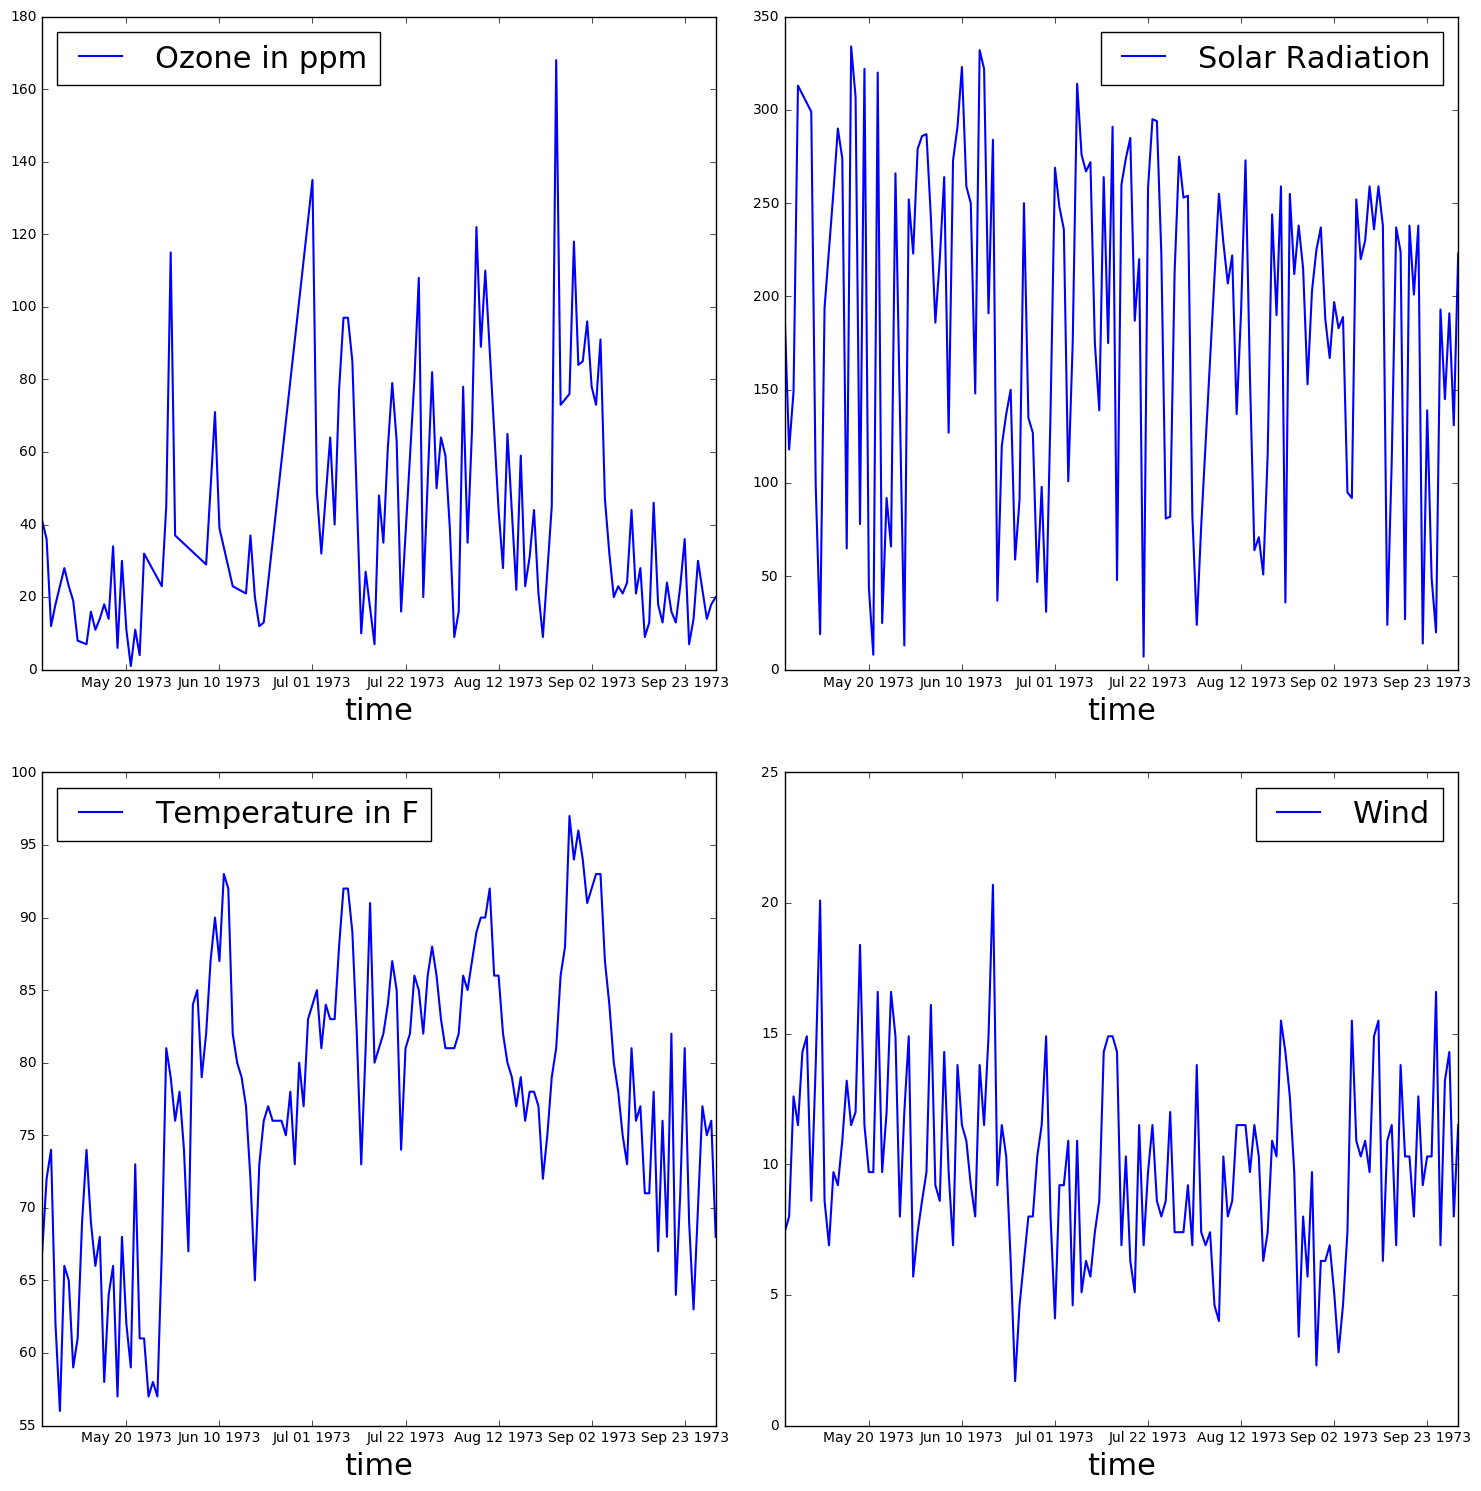

In [8]:
#Let's plot the data
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(2, 2, bottom=0.18, left=0.18, right=0.88)

axOz = fig.add_subplot(gs[0])
axSol = fig.add_subplot(gs[1])
axWind = fig.add_subplot(gs[2])
axTemp = fig.add_subplot(gs[3])

# Get time axis
x_date = df_temp["Date"].values

# Get the y values 
y_oz = df_temp["Ozone_interp"].values
y_sol = df_temp["Solar.R_interp"].values
y_temp = df_temp["Temp"].values
y_wind = df_temp["Wind"].values


# Plot
axOz.plot(x_date, y_oz, label = "Ozone in ppm", linewidth=1.5)
axSol.plot(x_date, y_sol, label = "Solar Radiation", linewidth=1.5)
axWind.plot(x_date, y_temp, label = "Temperature in F", linewidth=1.5)
axTemp.plot(x_date, y_wind, label = "Wind", linewidth=1.5)


#####################
# Figure cosmetics
#####################

# Axis labels, legend and formatting
for ax in [axOz, axSol, axWind, axTemp]:
    ax.set_xlabel("time", fontsize=22)
    ax.legend(loc="best", fontsize=22)
    

# improve plot layout
gs.tight_layout(fig, h_pad=3)

plt.savefig("visual.png")
plt.show() #uncomment to plot


![glob](visual.png)

### Let's look at correlations

We will now look at an interesting way to see interactions between time-series data : running correlations.  

As a reminder, look at the formula below for the formula of the sample correlation coefficient $r$.

![corr](corr.png)


The running correlation has an extra twist to it. We select a window of points (let's say 30) on which we compute the correlation coefficient. And then we slide this window in time.

So the first value of $r$ is given by points $1, 2, 3, ... 30$.  
The second value of $r$ is given by points $2, 3, 4, ... 31$.
And so on

This is where the phrase "running" comes from. This running correlation gives us information of how the correlation of two time series evolves with time.


In [13]:
# Clear plotting
plt.clf()
plt.close()

#Let's plot the data
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(2, 1, bottom=0.18, left=0.18, right=0.88)

ax7 = fig.add_subplot(gs[0])
ax30 = fig.add_subplot(gs[1])

# Get time axis
x_date = df_temp["Date"].values

# Get the y values 

r_sol7 = pd.rolling_corr(df_temp["Ozone_interp"], df_temp["Solar.R_interp"],window=7)
r_sol30 = pd.rolling_corr(df_temp["Ozone_interp"], df_temp["Solar.R_interp"],window=30)

r_wind7 = pd.rolling_corr(df_temp["Ozone_interp"], df_temp["Wind"],window=7)
r_wind30 = pd.rolling_corr(df_temp["Ozone_interp"], df_temp["Wind"],window=30)

# On the first few points, no correlation can be computed (because there are not enough previous points)
# This gives a NaN value
# We arbitrarily set this to 0.
r_sol7 = r_sol7.fillna(0)
r_sol30 = r_sol30.fillna(0)
r_wind7 = r_wind7.fillna(0)
r_wind30 = r_wind30.fillna(0)


# Plot
ax7.plot(x_date, r_sol7, label = "7d corr Ozone/Solar", linewidth=1.5, color = "r")
ax7.plot(x_date, r_wind7, label = "7d corr Ozone/Wind", linewidth=1.5, color = "k")
ax30.plot(x_date, r_sol30, label = "30d corr Ozone/Solar", linewidth=1.5, color = "r")
ax30.plot(x_date, r_wind30, label = "30d corr Ozone/Wind", linewidth=1.5, color = "k")

#####################
# Figure cosmetics
#####################

# Axis labels, legend and formatting
for ax in [ax7, ax30]:
    ax.set_xlabel("time", fontsize=22)
    ax.set_ylabel("Correlation coefficient", fontsize=22)
    ax.legend(loc="best", fontsize=22)
    

# improve plot layout
gs.tight_layout(fig, h_pad=5)

plt.savefig("visual2.png")
#plt.show() #uncomment to plot

![vis2]("visual2.png")


# What do we learn from all this ?

- On a 7 days window, the correlation coefficient changes wildly. 
- There is a single period (july / august) where we see a trend (Solar radiation is correlated to Ozone, Wind is anti-correlated to Ozone)
- On a 30 days window, we see much stronger trends. Wind is strongly anti-correlated to Ozone and the anticorrelation increases up to September. Solar radiation is mildly correlated to Ozone


This quick study gives us very important information :

- The interplay of meteorological factor is better understood on large time scales (one month rather than one week).
- Wind and Ozone are clearly anticorrelated. This seems logical (strong winds will dissipate large concentrations of Ozone).
- Ozone and sun are correlated. This is also expected because Ozone is expected to be created by the interaction of sunlight on air containing hydrocarbons and nitrogen oxides.

This should guide feature selection and feature engineering when we then try to apply supervised learning to such a problem.